# Load the loss values on subsets

In [96]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
from methylVA.utils.common import load_config
from methylVA.data_processing.utils import load_data_tensor, load_train_test_data, sample_data
from methylVA.plots.loss_convergence import plot_training_and_validation_losses


config = load_config("../methylVA/configs/random_data_config.yaml")

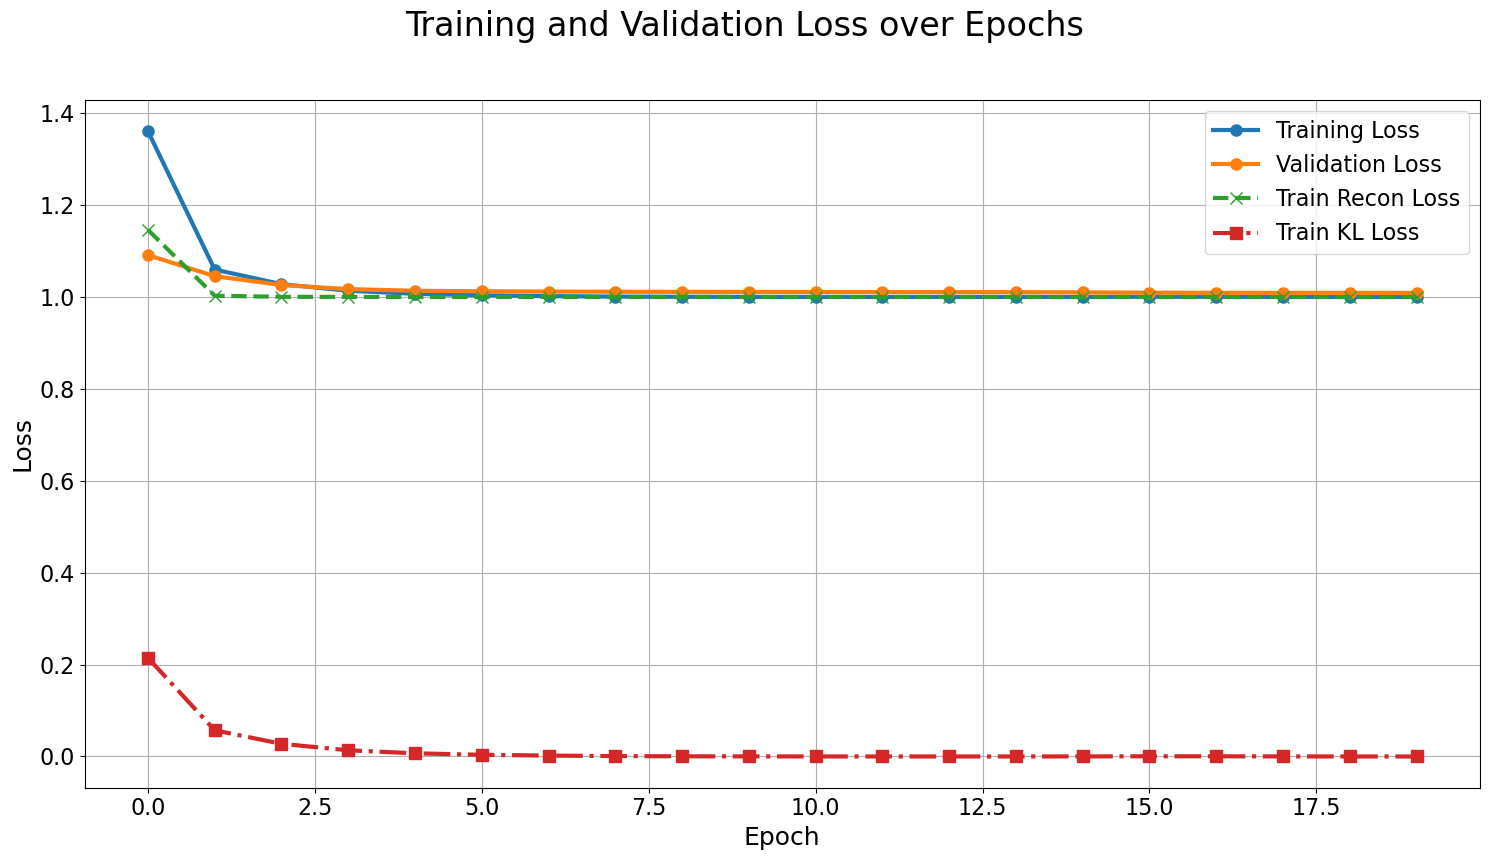

In [94]:
file_path = "../experiments/random_data_vae/vae/version_5/metrics.csv"
plot_training_and_validation_losses(file_path)

In [83]:
config_training = config['training_vae']
train_loader, val_loader, test_loader = load_data_tensor(config_training)


In [102]:
from methylVA.training.load_vae import load_trained_vae

hparams_path = '../experiments/random_data_vae/vae/version_5/hparams.yaml'  # Replace with the correct path
checkpoint_path = "../experiments/random_data_vae/vae/version_5/checkpoints/vae-epoch=19-val_loss=1.01.ckpt"

vae_model = load_trained_vae(checkpoint_path, hparams_path)

In [103]:

X_train, y_train, X_val, y_val, X_test, y_test = load_data(config_training)
# Convert training data to NumPy array if it's a DataFrame
if hasattr(X_train, 'values'):
    X_train = X_train.values
if hasattr(X_val, 'values'):
    X_val = X_val.values
if hasattr(X_test, 'values'):
    X_test = X_test.values



In [105]:
from methylVA.training.trainer_utils import reconstruct_data, correlation_between_rows
# Reconstruct selected rows of training data
original_matrix, reconstructed_matrix = reconstruct_data(vae_model, X_train, num_rows=10)

# Print the original and reconstructed matrices
print("Original Matrix:\n", original_matrix)
print("Reconstructed Matrix:\n", reconstructed_matrix)


Original Matrix:
 [[-0.78397502 -1.11454292 -0.08323802 ... -0.57030208 -0.28281668
   1.11659775]
 [ 0.16205038  2.54823914  1.32459253 ...  1.78718573  0.95589734
  -0.16335681]
 [ 0.72328016 -0.54933556  0.83088893 ...  1.27330407  1.35686545
   0.37270819]
 ...
 [-0.5995104   2.32175794  1.00485951 ...  0.20464296 -0.94659825
  -0.37488782]
 [-0.82914214 -0.01444269  0.9723309  ...  0.7532192  -0.03652755
   1.22360081]
 [ 0.08377339 -0.11318765  0.79567148 ...  0.00647108  1.40046716
   3.28979678]]
Reconstructed Matrix:
 [[0.00295127 0.00031469 0.00018142 ... 0.00051099 0.02319221 0.00030309]
 [0.00269723 0.00034776 0.000201   ... 0.00046872 0.02210682 0.00031448]
 [0.00261859 0.00032491 0.00018089 ... 0.00050135 0.02392091 0.00026338]
 ...
 [0.00281316 0.00031259 0.00018469 ... 0.00049962 0.02206141 0.00028172]
 [0.00295989 0.00031244 0.00017491 ... 0.00048557 0.02189877 0.00030819]
 [0.00253457 0.00030845 0.00016916 ... 0.00050574 0.02187188 0.0002697 ]]


In [106]:
cor = correlation_between_rows(original_matrix, reconstructed_matrix)


In [107]:
print(f"maximum correlation: {np.max(cor)}")
print(f"median correlation: {np.median(cor)}")

maximum correlation: 0.024845108986367073
median correlation: 0.014987194252042965


0.2 drop_out

maximum correlation: 0.025403004727198926

median correlation: 0.016188194530154198